# Open RL Benchmark: Comprehensive Tracked Experiments for Reinforcement Learning


[<img src="https://img.shields.io/badge/license-MIT-blue">](https://github.com/vwxyzjn/cleanrl)
[![Code style: black](https://img.shields.io/badge/code%20style-black-000000.svg)](https://github.com/psf/black)
[![Imports: isort](https://img.shields.io/badge/%20imports-isort-%231674b1?style=flat&labelColor=ef8336)](https://pycqa.github.io/isort/)
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/openrlbenchmark/openrlbenchmark/blob/master/README.ipynb)


Open RL Benchmark is a comprehensive collection of tracked experiments for RL. It aims to make it easier for RL practitioners to pull and compare all kinds of metrics from reputable RL libraries like Stable-baselines3, Tianshou, CleanRL, and others.

* 💾 [GitHub Repo](https://github.com/openrlbenchmark/openrlbenchmark): source code and more docs.
* 📜 [Design docs](https://docs.google.com/document/d/1cDI_AMr2QVmkC53dCHFMYwGJtLC8V4p6KdL2wnYPaiI/edit?usp=sharing): check out our motivation and vision.
* 🔗 [Open RL Benchmark reports](https://wandb.ai/openrlbenchmark/openrlbenchmark/reportlist): featuring W&B reports with tracked Atari, MuJoCo experiments from SB3, CleanRL, and others.


## Installation

You can install via `pip`:

In [16]:
!pip install openrlbenchmark -q

## Get started

Open RL Benchmark provides an RLops CLI to pull and compare metrics from Weights and Biases. The following example shows how to compare the performance of SB3's ppo, a2c, ddpg, ppo_lstm, sac, td3, ppo, trpo, CleanRL's sac on `HalfCheetahBulletEnv-v0`.

In [17]:
import wandb
wandb.login()

wandb: Currently logged in as: costa-huang. Use `wandb login --relogin` to force relogin


True

In [18]:
%%sh
python -m openrlbenchmark.rlops \
    --filters '?we=openrlbenchmark&wpn=cleanrl&ceik=env_id&cen=exp_name&metric=charts/episodic_return' \
        'ppo_continuous_action?tag=v1.0.0-27-gde3f410&cl=CleanRL PPO' \
    --filters '?we=openrlbenchmark&wpn=baselines&ceik=env&cen=exp_name&metric=charts/episodic_return' \
        'baselines-ppo2-mlp?cl=openai/baselines PPO2' \
    --env-ids HalfCheetah-v2 Hopper-v2 Walker2d-v2 \
    --env-ids HalfCheetah-v2 Hopper-v2 Walker2d-v2 \
    --no-check-empty-runs \
    --pc.ncols 3 \
    --pc.ncols-legend 3 \
    --rliable \
    --rc.score_normalization_method maxmin \
    --rc.normalized_score_threshold 1.0 \
    --rc.sample_efficiency_plots \
    --rc.sample_efficiency_and_walltime_efficiency_method Median \
    --rc.performance_profile_plots  \
    --rc.aggregate_metrics_plots  \
    --rc.sample_efficiency_num_bootstrap_reps 10 \
    --rc.performance_profile_num_bootstrap_reps 10 \
    --rc.interval_estimates_num_bootstrap_reps 10 \
    --output-filename static/0compare \
    --scan-history

{
│   'wandb_project_name': 'cleanrl',
│   'wandb_entity': 'openrlbenchmark',
│   'custom_env_id_key': 'env_id',
│   'custom_exp_name_key': 'exp_name',
│   'metric': 'charts/episodic_return'
}
/usr/local/lib/python3.10/dist-packages/openrlbenchmark/dataset/openrlbenchmark/cleanrl/offline.sqlite
========= ppo_continuous_action?tag=v1.0.0-27-gde3f410&cl=CleanRL PPO
{
│   'wandb_project_name': 'baselines',
│   'wandb_entity': 'openrlbenchmark',
│   'custom_env_id_key': 'env',
│   'custom_exp_name_key': 'exp_name',
│   'metric': 'charts/episodic_return'
}
/usr/local/lib/python3.10/dist-packages/openrlbenchmark/dataset/openrlbenchmark/baselines/offline.sqlite
========= baselines-ppo2-mlp?cl=openai/baselines PPO2
collecting runs for HalfCheetah-v2
loading <Run openrlbenchmark/cleanrl/8hyj8xiy (finished)> https://wandb.ai/openrlbenchmark/cleanrl/runs/8hyj8xiy
loading <Run openrlbenchmark/cleanrl/2cuwo78n (finished)> https://wandb.ai/openrlbenchmark/cleanrl/runs/2cuwo78n
loading <Run openrlben

wandb: Thanks for trying out the Report API!
wandb: For a tutorial, check out https://colab.research.google.com/drive/1CzyJx1nuOS4pdkXa2XPaRQyZdmFmLmXV
wandb: 
wandb: Try out tab completion to see what's available.
wandb:   ∟ everything:    `wr.<tab>`
wandb:       ∟ panels:    `wr.panels.<tab>`
wandb:       ∟ blocks:    `wr.blocks.<tab>`
wandb:       ∟ helpers:   `wr.helpers.<tab>`
wandb:       ∟ templates: `wr.templates.<tab>`
wandb:       
wandb: For bugs/feature requests, please create an issue on github: https://github.com/wandb/wandb/issues
/usr/local/lib/python3.10/dist-packages/openrlbenchmark/rlops.py:812: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  fig.tight_layout()


Here, we created multiple filters. The first string in the first filter is `'?we=openrlbenchmark&wpn=baselines&ceik=env&cen=exp_name&metric=charts/episodic_return'`, which is a query string that specifies the following:

* `we`: the W&B entity name
* `wpn`: the W&B project name
* `ceik`: the custom key for the environment id
* `cen`: the custom key for the experiment name
* `metric`: the metric we are interested in

So we are fetching metrics from [https://wandb.ai/openrlbenchmark/baselines](https://wandb.ai/openrlbenchmark/baselines). The environment id is stored in the `env` key, and the experiment name is stored in the `exp_name` key. The metric we are interested in is `charts/episodic_return`.

Similarly, we are fetching metrics from [https://wandb.ai/openrlbenchmark/cleanrl](https://wandb.ai/openrlbenchmark/cleanrl). The environment id is stored in the `env_id` key, and the experiment name is stored in the `exp_name` key. The metric we are interested in is `charts/episodic_return`. You can also customize the legend with the `cl` query string, such as `ppo_lstm?cl=PPO w/ LSTM`.

The labels of the figure can be customized with the `--pc.xlabel` and `--pc.ylabel` flags. The `--pc.ncols` flag specifies the number of columns in the figure. The `--pc.ncols-legend` flag specifies the number of columns in the legend. The `--output-filename` flag specifies the filename of the output figure

The `--rliable` toggles our [rliable](https://github.com/google-research/rliable) integration, and its configuration can be tweeked via `--rc`. The command above generates the following plot:

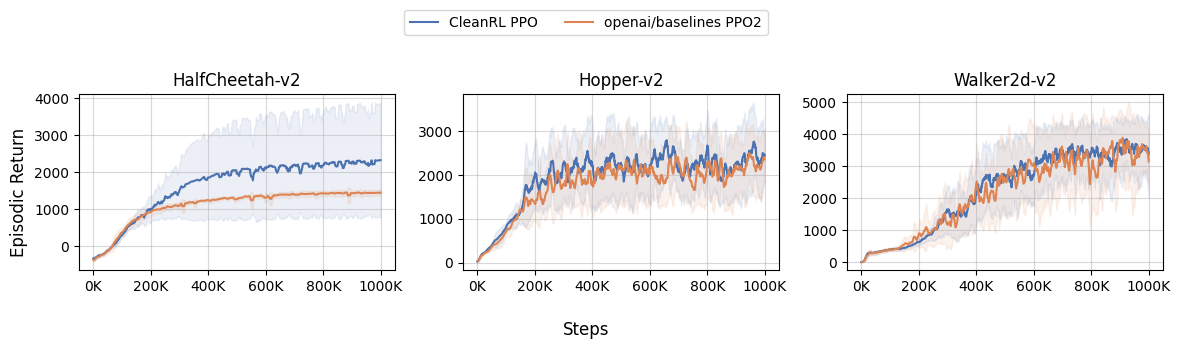

In [19]:
from IPython.display import Image
Image('static/0compare.png')

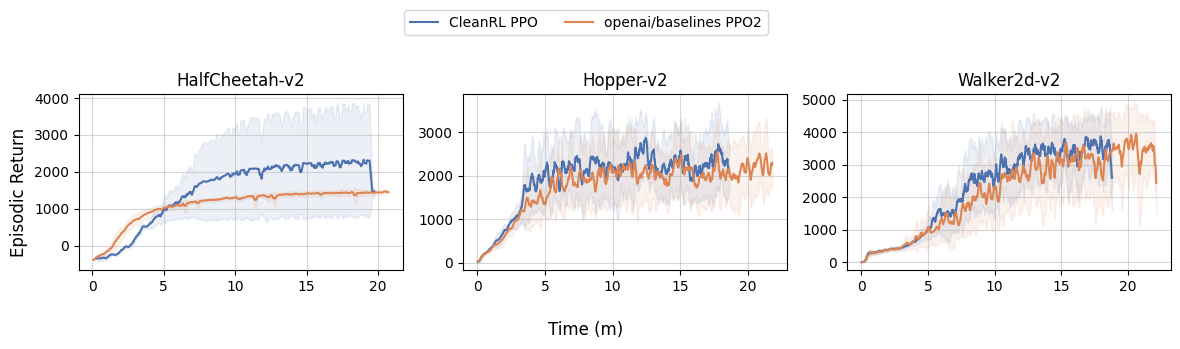

In [20]:
Image('static/0compare-time.png')

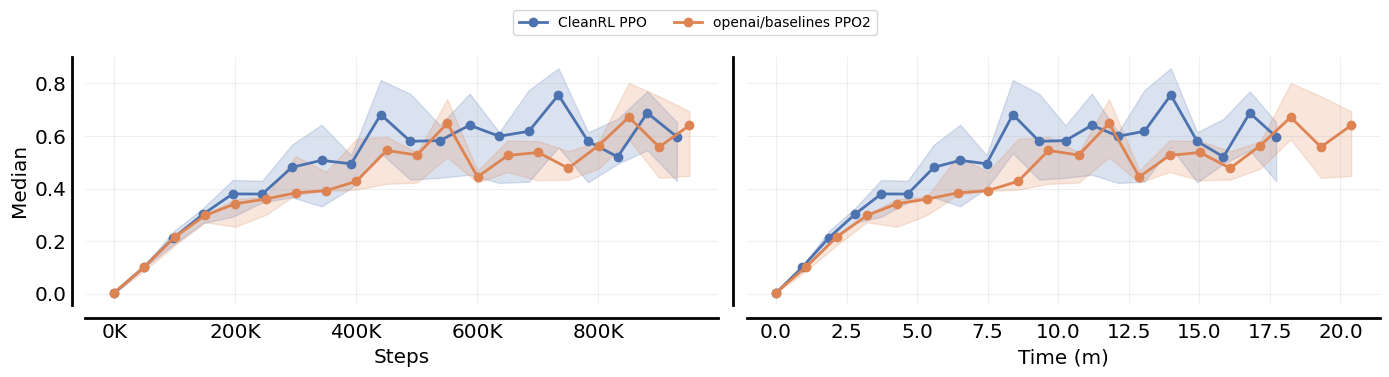

In [21]:
Image('static/0compare_sample_walltime_efficiency.png')

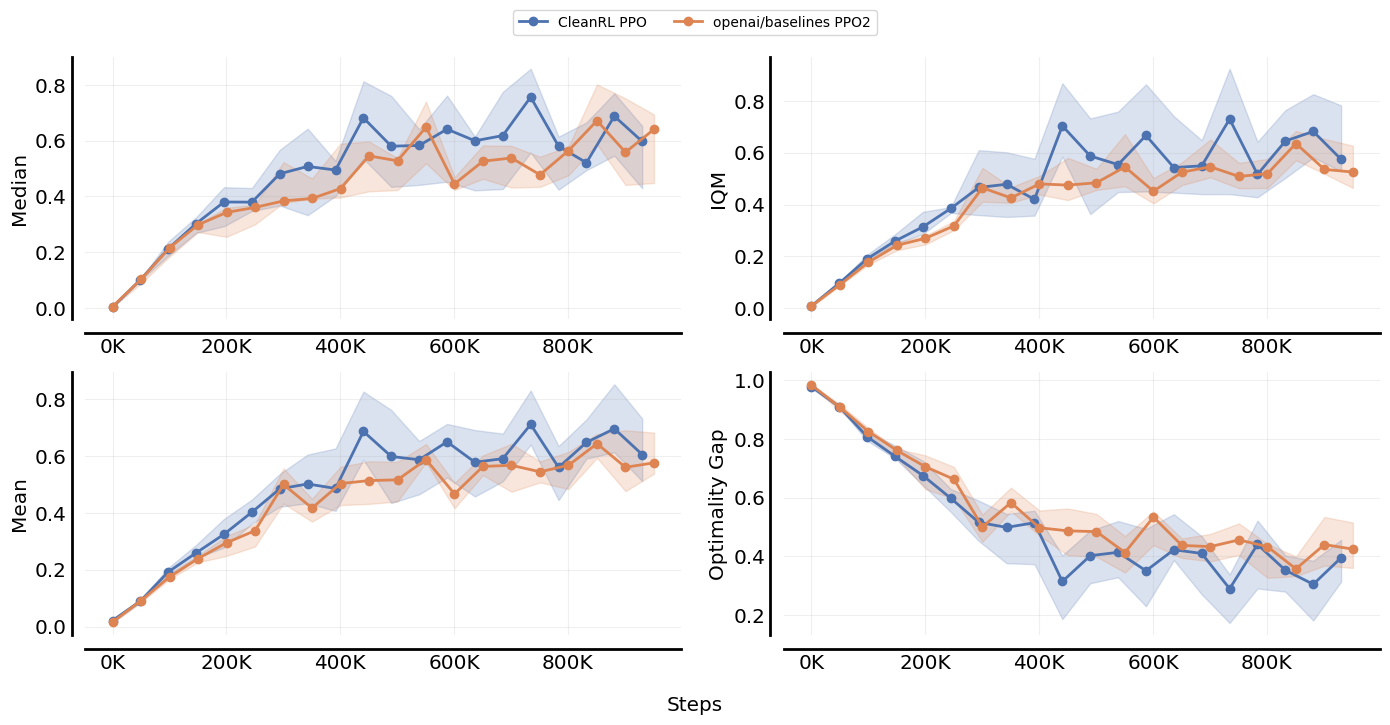

In [22]:
Image('static/0compare_sample_efficiency.png')

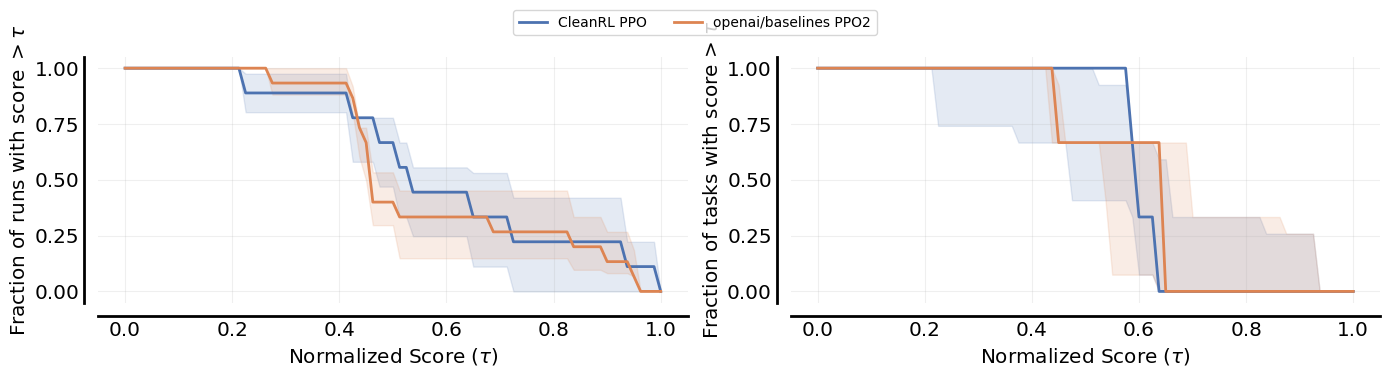

In [23]:
Image('static/0compare_performance_profile.png')

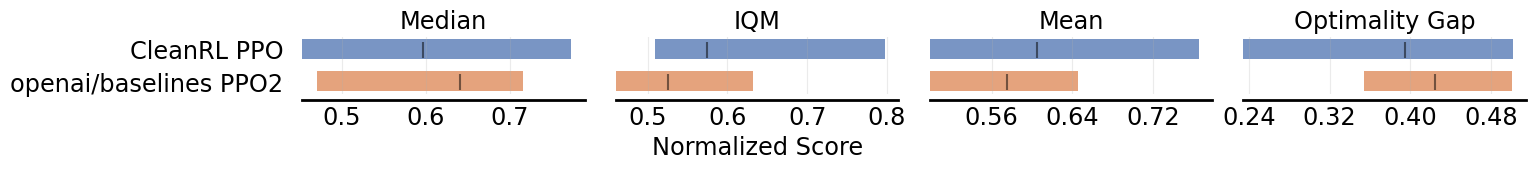

In [24]:
Image('static/0compare_aggregate.png')

In [25]:
from IPython.display import Markdown
Markdown("static/0compare.md")

|                | CleanRL PPO       | openai/baselines PPO2   |
|:---------------|:------------------|:------------------------|
| HalfCheetah-v2 | 2262.50 ± 1196.81 | 1428.55 ± 62.40         |
| Hopper-v2      | 2311.49 ± 440.99  | 2158.65 ± 302.33        |
| Walker2d-v2    | 3312.32 ± 429.87  | 3356.49 ± 322.61        |

In [26]:
Markdown("static/0compare_runtimes.md")

|                |   CleanRL PPO |   openai/baselines PPO2 |
|:---------------|--------------:|------------------------:|
| HalfCheetah-v2 |       18.7922 |                 19.5974 |
| Hopper-v2      |       17.376  |                 20.599  |
| Walker2d-v2    |       16.9909 |                 20.9507 |

## More documentation and examples

For more documentation and examples, feel free to check out our 💾 [GitHub Repo](https://github.com/openrlbenchmark/openrlbenchmark)